##### ## Optimizing Smart Street Lighting Based on Pedestrian Movement in Melbourne

**Authored by:** Saneli Wijesinghe  
**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, Data Cleaning, Data Visualization, Working with APIs, Basic Geospatial Concepts

---

 ## Scenario

As a city data analyst working on urban planning initiatives,
I want to evaluate whether current streetlight coverage effectively matches pedestrian traffic patterns across different times and locations in Melbourne,
So that I can identify areas that may be underlit or overlit, optimize energy use, and enhance public safety and walkability through data-driven smart lighting improvements.

---

  ## What this use case will teach you

This use case will teach you how to:
- Retrieve open datasets using API calls
- Clean and preprocess urban mobility and infrastructure data
- Extract and analyse GPS coordinates
- Perform basic spatial analysis
- Visualize relationships between movement patterns and lighting coverage

---

 ## Learning Outcomes

By the end of this use case, you will:
- Understand how to use APIs to pull data from open government portals
- Clean real-world data and extract coordinates
- Use latitude and longitude for location-based analysis
- Correlate infrastructure data with human movement
- Build insights into how data can drive smart city improvements

---

## Introduction: Evaluating Smart Street Lighting with Public Pedestrian Data

Street lighting is a fundamental component of urban infrastructure that influences not just visibility and safety, but also energy efficiency and sustainability. With the rise of smart cities, Melbourne has begun integrating intelligent lighting systems that respond dynamically to environmental factors and public movement.

This use case investigates how efficiently Melbourne’s council-owned smart streetlights are functioning in relation to pedestrian movement. Rather than relying on manually downloaded datasets, we demonstrate how to use the City of Melbourne's **open data APIs** to retrieve real-time or on-demand data directly into a Python environment.

We work with two datasets sourced via API:
- [Pedestrian Counting System – Monthly Counts per Hour](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/)
- [Street Lights with Emitted Lux Level – Council-Owned Lights Only](https://data.melbourne.vic.gov.au/explore/dataset/street-lights-with-emitted-lux-level-council-owned-lights-only/)

By combining these datasets, I aim to determine if lighting levels align with pedestrian activity, helping councils make data-informed decisions for improving lighting distribution, energy use, and safety in public spaces.


## Accessing Open Datasets Using APIs

To begin our analysis, we retrieve two datasets directly from the City of Melbourne’s Open Data Portal using API calls. This method allows us to access live or updated data without manual downloads.

I defined a reusable function `API_Unlimited()` that:
- Builds the API request URL using the dataset name
- Retrieves CSV data using the `requests` library
- Converts the response to a pandas DataFrame

This helps ensure that our data workflow is dynamic, clean, and adaptable for other datasets from the same portal.


In [4]:
import pandas as pd
import requests
from io import StringIO

def API_Unlimited(datasetname, apikey=None):
    base_url = f"https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/{datasetname}/exports/csv"
    params = {
        'limit': 500,
        'format': 'csv'
    }
    try:
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            csv_data = response.content.decode('utf-8')
            return pd.read_csv(StringIO(csv_data), sep=';')

        else:
            print(f"API call failed with status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Fetch data via API
pedestrian_data = API_Unlimited("pedestrian-counting-system-monthly-counts-per-hour")
streetlight_data = API_Unlimited("street-lights-with-emitted-lux-level-council-owned-lights-only")

# View a few rows to confirm
display(pedestrian_data.head())
display(streetlight_data.head())



,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,391020220630,39,2022-06-30,10,93,360,453,AlfPl_T,"-37.81379749, 144.96995745"
1,501420210916,50,2021-09-16,14,73,50,123,Lyg309_T,"-37.79808192, 144.96721013"
2,1361320240812,136,2024-08-12,13,93,78,171,BirFed1120_T,"-37.8184141, 144.97357915"
3,28620230413,28,2023-04-13,6,111,56,167,VAC_T,"-37.82129925, 144.96879309"
4,862120240429,86,2024-04-29,21,3,14,17,574Qub_T,"-37.80309992, 144.94908064"


,geo_point_2d,geo_shape,prop_id,name,addresspt1,xorg,ext_id,asset_clas,label,asset_type,...,northing,str_id,addresspt,asset_subt,xsource,profile,xdate,xdrawing,mcc_id,roadseg_id
0,"-37.8116730000823, 144.98066700010136","{""coordinates"": [144.98066700010136, -37.81167...",0,NaN,0.0,ESG,35350,NaN,0.684,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
1,"-37.81162799991352, 144.9806740000221","{""coordinates"": [144.9806740000221, -37.811627...",0,NaN,0.0,ESG,35364,NaN,0.196,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
2,"-37.811394999928474, 144.9807329998954","{""coordinates"": [144.9807329998954, -37.811394...",0,NaN,0.0,ESG,35436,NaN,3.715,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
3,"-37.81138100024879, 144.98073799991442","{""coordinates"": [144.98073799991442, -37.81138...",0,NaN,0.0,ESG,35440,NaN,2.835,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
4,"-37.81117199989421, 144.9785690000381","{""coordinates"": [144.9785690000381, -37.811171...",0,NaN,0.0,ESG,36934,NaN,3.030,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0


##  Preview of Datasets

Before diving into analysis or merging operations, it's essential to understand the **structure, column names, and formats** of each dataset.

I am working with two public datasets sourced via the **City of Melbourne Open Data API**:

- **Pedestrian Dataset:** Contains hourly pedestrian counts collected from sensors placed around Melbourne. Each record includes the time (`sensing_date`, `hourday`), sensor metadata (`sensor_name`, `location_id`), direction-wise counts (`direction_1`, `direction_2`), and GPS coordinates.
- **Streetlight Dataset:** Contains information about **council-owned streetlights**, including their location (`geo_point_2d`), emitted lux level (`label`), and technical attributes like `asset_type`, `ext_id`, and more.

Previewing the first few rows of each dataset helps verify:
- The data was retrieved successfully
- Columns are named as expected
- Any potential cleaning or transformation needs

Below are the previews for both datasets:


In [8]:
# Preview first few rows of pedestrian data
pedestrian_data.head()



,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,53920220911,53,2022-09-11,9,197,144,341,Col254_T,"-37.81564191, 144.965499"
1,271320221014,27,2022-10-14,13,163,108,271,Vic_T,"-37.80606888, 144.95644692"
2,522120240616,52,2024-06-16,21,110,88,198,Eli263_T,"-37.81252157, 144.9619401"
3,561120221128,56,2022-11-28,11,223,146,369,Lon364_T,"-37.81234775, 144.96153311"
4,592320230524,59,2023-05-24,23,183,83,266,RMIT_T,"-37.80825648, 144.96304859"


In [6]:
# Preview first few rows of streetlight data
streetlight_data.head()



,geo_point_2d,geo_shape,prop_id,name,addresspt1,xorg,ext_id,asset_clas,label,asset_type,...,northing,str_id,addresspt,asset_subt,xsource,profile,xdate,xdrawing,mcc_id,roadseg_id
0,"-37.8116730000823, 144.98066700010136","{""coordinates"": [144.98066700010136, -37.81167...",0,NaN,0.0,ESG,35350,NaN,0.684,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
1,"-37.81162799991352, 144.9806740000221","{""coordinates"": [144.9806740000221, -37.811627...",0,NaN,0.0,ESG,35364,NaN,0.196,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
2,"-37.811394999928474, 144.9807329998954","{""coordinates"": [144.9807329998954, -37.811394...",0,NaN,0.0,ESG,35436,NaN,3.715,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
3,"-37.81138100024879, 144.98073799991442","{""coordinates"": [144.98073799991442, -37.81138...",0,NaN,0.0,ESG,35440,NaN,2.835,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0
4,"-37.81117199989421, 144.9785690000381","{""coordinates"": [144.9785690000381, -37.811171...",0,NaN,0.0,ESG,36934,NaN,3.030,NaN,...,0.0,0,0,NaN,NaN,NaN,20140916,NaN,0,0


##  Column Overview

After previewing the raw data, we inspect the full list of column names for each dataset.

This helps us:
- Understand the data schema and what variables are available
- Identify which columns are relevant for merging or analysis
- Spot any redundant or unclear fields that may need renaming or dropping

### Column Lists
- **Pedestrian Dataset** includes temporal and sensor-related fields like `sensing_date`, `hourday`, and `pedestriancount`.
- **Streetlight Dataset** contains technical and geospatial fields such as `geo_point_2d`, `label` (light intensity), and `asset_type`.

I have now listed all columns in both datasets:


In [8]:
# List all columns

print("Pedestrian Columns:", pedestrian_data.columns.tolist())
print("Streetlight Columns:", streetlight_data.columns.tolist())


Pedestrian Columns: ['id', 'location_id', 'sensing_date', 'hourday', 'direction_1', 'direction_2', 'pedestriancount', 'sensor_name', 'location']
Streetlight Columns: ['geo_point_2d', 'geo_shape', 'prop_id', 'name', 'addresspt1', 'xorg', 'ext_id', 'asset_clas', 'label', 'asset_type', 'easting', 'northing', 'str_id', 'addresspt', 'asset_subt', 'xsource', 'profile', 'xdate', 'xdrawing', 'mcc_id', 'roadseg_id']


##  Missing Value Check

Before performing analysis or merging datasets, it's important to assess data quality — especially missing values. This step ensures we handle any inconsistencies or gaps that could affect results.

-  **Pedestrian dataset** is fully complete — all columns have zero missing values.
-  **Streetlight dataset** contains missing values in multiple columns like:
  - `name`, `asset_clas`, `asset_type`, `asset_subt`, and `profile`

These may represent optional or non-critical fields for our use case. We will consider dropping or ignoring them unless they become relevant for feature engineering.

Below is the output summary:


In [10]:
# Check for missing values
print("Pedestrian missing values:\n", pedestrian_data.isnull().sum())
print("\nStreetlight missing values:\n", streetlight_data.isnull().sum())


Pedestrian missing values:
 id                 0
location_id        0
sensing_date       0
hourday            0
direction_1        0
direction_2        0
pedestriancount    0
sensor_name        0
location           0
dtype: int64

Streetlight missing values:
 geo_point_2d      0
geo_shape         0
prop_id           0
name            500
addresspt1        0
xorg              0
ext_id            0
asset_clas      500
label             0
asset_type      500
easting           0
northing          0
str_id            0
addresspt         0
asset_subt      500
xsource         500
profile         500
xdate             0
xdrawing        500
mcc_id            0
roadseg_id        0
dtype: int64


##  Cleaning the Streetlight Dataset

To prepare the **streetlight dataset** for meaningful analysis, we first clean it by dropping irrelevant or mostly empty columns and handling any remaining missing values.

---

###  Why Clean the Dataset?

From the earlier inspection of missing values, we saw that several columns in the streetlight dataset contain **no usable information**. For instance, the following columns had **500 missing values**, meaning they are empty across the entire dataset:

- `name`
- `asset_clas`
- `asset_type`
- `asset_subt`

Since these columns offer no value to our analysis, we remove them to streamline the dataset.

---

###  Step 1: Drop Irrelevant or Empty Columns

I defined a list of the columns to drop and use the `drop()` function to remove them from the DataFrame.

```python
columns_to_drop = ['name', 'asset_clas', 'asset_type', 'asset_subt']
streetlight_data_cleaned = streetlight_data.drop(columns=columns_to_drop)


In [12]:
# Drop irrelevant or mostly empty columns in streetlight data
columns_to_drop = ['name', 'asset_clas', 'asset_type', 'asset_subt']
streetlight_data_cleaned = streetlight_data.drop(columns=columns_to_drop)

# Optionally, drop rows with any remaining missing values (if needed)
streetlight_data_cleaned = streetlight_data_cleaned.dropna()

# View cleaned data
display(streetlight_data_cleaned.head())


,geo_point_2d,geo_shape,prop_id,addresspt1,xorg,ext_id,label,easting,northing,str_id,addresspt,xsource,profile,xdate,xdrawing,mcc_id,roadseg_id


## Checking Data Types of Both Datasets

Before diving deeper into merging or applying transformations, it's essential to understand the **data types** of each column in the datasets. This helps ensure:

- Compatibility when joining datasets
- Appropriate conversions (e.g., turning strings into floats or datetime formats)
- Avoiding errors during analysis and visualization

---

###  Pedestrian Dataset

Analyzing the data types of the **pedestrian dataset** helps ensure smooth processing and visualization. Here are the key observations:

- Most columns like `id`, `location_id`, `hourday`, `direction_1`, `direction_2`, and `pedestriancount` are stored as `int64`, which is suitable for numerical analysis and aggregations.
- Columns such as `sensing_date`, `sensor_name`, and `location` are stored as `object` types:
  - `sensing_date` will need to be converted to `datetime` format for time-based filtering or trend analysis.
  - `location` stores GPS coordinates as strings and must be split into separate `Latitude` and `Longitude` float columns for spatial analysis.
  - `sensor_name` is a string identifier for the pedestrian counter device and can remain as an object.

This inspection ensures we identify necessary preprocessing steps like **type conversion** and **column splitting** before deeper analysis.
 


In [14]:
# Check data types
print("Pedestrian data types:\n", pedestrian_data.dtypes)
print("\nStreetlight data types:\n", streetlight_data.dtypes)


Pedestrian data types:
 id                  int64
location_id         int64
sensing_date       object
hourday             int64
direction_1         int64
direction_2         int64
pedestriancount     int64
sensor_name        object
location           object
dtype: object

Streetlight data types:
 geo_point_2d     object
geo_shape        object
prop_id           int64
name            float64
addresspt1      float64
xorg             object
ext_id            int64
asset_clas      float64
label           float64
asset_type      float64
easting         float64
northing        float64
str_id            int64
addresspt         int64
asset_subt      float64
xsource         float64
profile         float64
xdate             int64
xdrawing        float64
mcc_id            int64
roadseg_id        int64
dtype: object


###  Splitting Geospatial Coordinates into Latitude and Longitude

In both datasets, geospatial location data is stored as a single string column:
- `location` in the **Pedestrian Dataset**
- `geo_point_2d` in the **Streetlight Dataset**

These columns combine **latitude and longitude** into a single string, separated by a comma (e.g., `"-37.79453803, 144.93036194"`).  
To enable spatial analysis, we must split these into separate **Latitude** and **Longitude** columns and convert them into numeric types.

I used the `str.split(',', expand=True)` method followed by `.astype(float)` to:
- Extract the first value as **Latitude**
- Extract the second value as **Longitude**

####  Output Preview
The extracted coordinates now appear as two clean float columns:


This conversion is **crucial for geospatial tasks** such as:
- Mapping foot traffic and lighting locations
- Calculating proximity between sensors and lights
- Performing spatial joins and clustering


In [16]:
##Split GPS coordinates into latitude & longitude
# For pedestrian dataset
pedestrian_data[['Latitude', 'Longitude']] = pedestrian_data['location'].str.split(',', expand=True)
pedestrian_data['Latitude'] = pedestrian_data['Latitude'].astype(float)
pedestrian_data['Longitude'] = pedestrian_data['Longitude'].astype(float)

# For streetlight dataset
streetlight_data[['Latitude', 'Longitude']] = streetlight_data['geo_point_2d'].str.split(',', expand=True)
streetlight_data['Latitude'] = streetlight_data['Latitude'].astype(float)
streetlight_data['Longitude'] = streetlight_data['Longitude'].astype(float)
print(pedestrian_data[['Latitude', 'Longitude']].head())
print(streetlight_data[['Latitude', 'Longitude']].head())




    Latitude   Longitude
0 -37.813797  144.969957
1 -37.798082  144.967210
2 -37.818414  144.973579
3 -37.821299  144.968793
4 -37.803100  144.949081
    Latitude   Longitude
0 -37.811673  144.980667
1 -37.811628  144.980674
2 -37.811395  144.980733
3 -37.811381  144.980738
4 -37.811172  144.978569


### Mapping Pedestrian Sensors to Nearest Streetlights Using Nearest Neighbors

To assess whether smart lighting is effectively covering pedestrian traffic areas, we need to spatially connect each **pedestrian sensor** to its **nearest streetlight**.

Using the **k-Nearest Neighbors** algorithm (k=1), I found the closest streetlight based on latitude and longitude coordinates.

**Steps performed:**
- Prepared coordinate arrays for pedestrian sensors and streetlights.
- Fitted a `NearestNeighbors` model using a Ball Tree algorithm for efficient geospatial queries.
- For each pedestrian sensor, identified the **index** and **distance** to the nearest streetlight.
- Appended the nearest light’s index and distance back into the pedestrian dataset for analysis.

**Sample Output:**
- Small distance values (e.g., `0.0025`) suggest strong proximity between a sensor and its nearest light.
- Repeated index values (e.g., `499`) imply that **multiple sensors** may be closest to the **same light**, possibly indicating a high-foot-traffic zone.

This spatial linkage enables us to:
- Evaluate if high-traffic pedestrian areas are illuminated adequately.
- Flag potential **lighting gaps** for urban improvement.


In [18]:
##Use Nearest Neighbors to Match Sensors to Lights
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Prepare coordinate arrays
ped_coords = pedestrian_data[['Latitude', 'Longitude']].to_numpy()
light_coords = streetlight_data[['Latitude', 'Longitude']].to_numpy()

# Fit Nearest Neighbors model on streetlight coordinates
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(light_coords)

# Find nearest streetlight for each pedestrian location
distances, indices = nbrs.kneighbors(ped_coords)

# Add nearest light info to pedestrian_df
pedestrian_data['Nearest_Light_Index'] = indices.flatten()
pedestrian_data['Distance_to_Light'] = distances.flatten()

# Print the first 5 matches
print("Distances to nearest streetlight:\n", distances[:5])
print("Indices of nearest streetlights:\n", indices[:5])



Distances to nearest streetlight:
 [[0.00438368]
 [0.01326658]
 [0.00517614]
 [0.0102761 ]
 [0.01128087]]
Indices of nearest streetlights:
 [[499]
 [499]
 [246]
 [499]
 [446]]


##  Analyzing Lighting Efficiency vs Pedestrian Traffic

In this section, we evaluate whether current streetlight brightness levels (lux values) appropriately match pedestrian movement patterns across Melbourne. Using spatial proximity and pedestrian counts, we identify **potential mismatches** in lighting allocation.

### Step-by-step Approach:

1. **Find Nearest Streetlight to Each Pedestrian Sensor:**
   - Using `NearestNeighbors`, we matched each pedestrian sensor location to its nearest smart streetlight based on GPS coordinates.
   - We recorded the index and distance to the closest light.

2. **Attach Light Brightness (Lux) to Pedestrian Sensors:**
   - We extracted the lux level (`label`) from the matched streetlight and added it to the pedestrian dataset under `Nearest_Light_Lux`.

3. **Detect Over-lit but Low Foot Traffic Areas:**
   - Sensors with **low pedestrian count (< 100)** but **very high lux values (> 50)**.
   - These areas may represent opportunities to reduce lighting and save energy without compromising safety.

4. **Detect Under-lit but High Foot Traffic Areas:**
   - Sensors with **high pedestrian activity (> 500)** but **very low lux levels (< 10)**.
   - These are priority areas for lighting improvement to enhance pedestrian safety.

---

###  Insights from the Results:

- **Over-lit, Low Traffic** examples include areas near `RMIT_T` sensors — well-lit but very few people walking through.
- **Under-lit, High Traffic** examples like `MCEC_T` and `WatCit_T` show thousands of pedestrians with low illumination — a potential safety risk.

This targeted analysis can help Melbourne's city planners **optimise smart streetlight usage**, improve safety outcomes, and reduce unnecessary energy consumption.



In [20]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# --- Step 0: Compute total foot traffic ---
pedestrian_data['Total_of_Directions'] = pedestrian_data['direction_1'] + pedestrian_data['direction_2']

# --- Step 1: Prepare coordinate arrays ---
ped_coords = pedestrian_data[['Latitude', 'Longitude']].to_numpy()
light_coords = streetlight_data[['Latitude', 'Longitude']].to_numpy()

# --- Step 2: Fit Nearest Neighbors model using streetlight locations ---
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(light_coords)

# --- Step 3: Find nearest streetlight for each pedestrian sensor ---
distances, indices = nbrs.kneighbors(ped_coords)

# --- Step 4: Store nearest light index and distance ---
pedestrian_data['Nearest_Light_Index'] = indices.flatten()
pedestrian_data['Distance_to_Light'] = distances.flatten()

# --- Step 5: Attach lux value from streetlight to pedestrian data ---
# Check if 'label' exists in streetlight_data
print("Streetlight data columns:", streetlight_data.columns.tolist())

# Map lux values to pedestrian sensors
pedestrian_data['Nearest_Light_Lux'] = pedestrian_data['Nearest_Light_Index'].apply(
    lambda i: streetlight_data.iloc[i]['label']  # Adjust 'label' if needed
)

# --- Step 6: Identify mismatches between foot traffic and lighting ---

# Case 1: Low foot traffic but high brightness
low_traffic_high_lux = pedestrian_data[
    (pedestrian_data['Total_of_Directions'] < 100) &
    (pedestrian_data['Nearest_Light_Lux'] > 50)
].sort_values(by='Nearest_Light_Lux', ascending=False)

# Case 2: High foot traffic but low brightness
high_traffic_low_lux = pedestrian_data[
    (pedestrian_data['Total_of_Directions'] > 500) &
    (pedestrian_data['Nearest_Light_Lux'] < 10)
].sort_values(by='Total_of_Directions', ascending=False)

# --- Step 7: Preview the results ---
# Use the correct sensor column name from your dataset; change 'Sensor_Name' if it's different
sensor_col = 'Sensor_Name'  # Replace with actual name if needed, or remove if not available

# Check available columns if unsure
# print(pedestrian_data.columns.tolist())

# If sensor_col exists, show it
if sensor_col in pedestrian_data.columns:
    print("☀️ Over-lit & Low Foot Traffic:\n", 
          low_traffic_high_lux[[sensor_col, 'Total_of_Directions', 'Nearest_Light_Lux']].head())
    
    print("\n🟣 Under-lit & High Foot Traffic:\n", 
          high_traffic_low_lux[[sensor_col, 'Total_of_Directions', 'Nearest_Light_Lux']].head())
else:
    print("☀️ Over-lit & Low Foot Traffic:\n", 
          low_traffic_high_lux[['Total_of_Directions', 'Nearest_Light_Lux']].head())
    
    print("\n🟣 Under-lit & High Foot Traffic:\n", 
          high_traffic_low_lux[['Total_of_Directions', 'Nearest_Light_Lux']].head())


Streetlight data columns: ['geo_point_2d', 'geo_shape', 'prop_id', 'name', 'addresspt1', 'xorg', 'ext_id', 'asset_clas', 'label', 'asset_type', 'easting', 'northing', 'str_id', 'addresspt', 'asset_subt', 'xsource', 'profile', 'xdate', 'xdrawing', 'mcc_id', 'roadseg_id', 'Latitude', 'Longitude']
☀️ Over-lit & Low Foot Traffic:
      Total_of_Directions  Nearest_Light_Lux
71                    83             99.022
102                   11             99.022
120                   55             99.022
156                   15             99.022
157                   39             99.022

🟣 Under-lit & High Foot Traffic:
      Total_of_Directions  Nearest_Light_Lux
232                 3131              2.737
15                  3036              2.737
215                 3004              2.737
406                 2788              2.737
303                 2736              2.737


### 🔦 Visualising Lighting vs Pedestrian Count

This scatter plot illustrates the relationship between pedestrian count (per hour) and the corresponding streetlight brightness (Lux) at nearby smart poles.

- I applied a filter to remove extreme outliers (above 1500 pedestrians/hour) to avoid skewing the plot.
- A small amount of jitter was added to brightness values to reduce overlap and better reveal density clusters.

#### Insights:
- Clusters of high Lux values (> 90) even when pedestrian activity is low suggest **potential over-lighting**.
- Many high-traffic locations appear to have Lux values below 10, indicating **under-lit but busy zones** — a safety concern.
- This visual further supports the need for **adaptive lighting** based on real-time pedestrian movement.




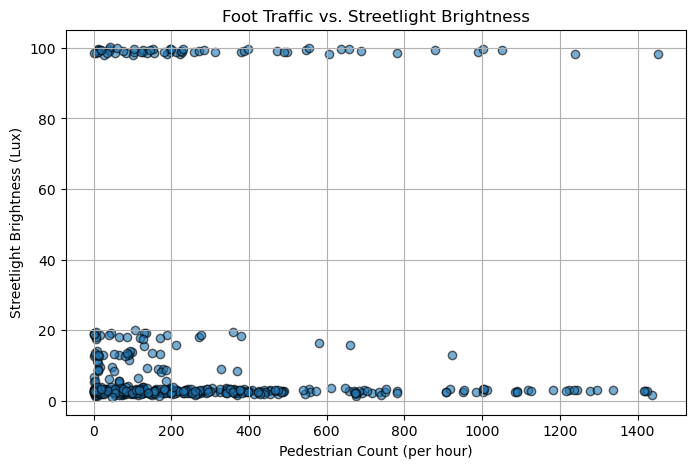

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Optional: Filter out outliers in pedestrian count for better readability
filtered_data = pedestrian_data[pedestrian_data['Total_of_Directions'] < 1500].copy()

# Optional: Add jitter to Lux values to avoid overplotting (lux steps like 0, 5, 10 cause horizontal lines)
jittered_lux = filtered_data['Nearest_Light_Lux'] + np.random.normal(0, 0.5, size=len(filtered_data))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(
    filtered_data['Total_of_Directions'],
    jittered_lux,
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel("Pedestrian Count (per hour)")
plt.ylabel("Streetlight Brightness (Lux)")
plt.title("Foot Traffic vs. Streetlight Brightness")
plt.grid(True)

# Optional: Uncomment to apply log scale for pedestrian counts
# plt.xscale('log')

plt.show()


###  Time-Based Analysis of Pedestrian Foot Traffic

In this section, I analyzed how pedestrian foot traffic varies over **time** to uncover temporal patterns in activity. By grouping the data by **hour** (if available) or **day**, we can visualise trends and identify peak times of pedestrian movement, which is critical for optimizing infrastructure decisions like smart lighting.

---

####  Methodology:

1. **Datetime Conversion**  
   - The `'sensing_date'` column was converted into a `datetime` object for easy extraction of time components.

2. **Dynamic Time Extraction**  
   - If the timestamp contains **hour-level data**, we extract the hour (0–23).  
   - If not, we fallback to extracting the **day** of the month (1–31).  
   - This ensures flexibility depending on the data's granularity.

3. **Average Foot Traffic Calculation**  
   - We group the data by the extracted time dimension (`HourDay`).  
   - Then compute the **average number of pedestrians** (`Total_of_Directions`) per time unit.

4. **Visualisation**  
   - A **line chart** is used to present the average pedestrian count.  
   - The x-axis dynamically switches between `"Hour of Day"` and `"Day"` based on the data.  
   - Helps easily spot periods of high or low foot traffic.

---

####  Insights from the Plot:
- The x-axis represents **days of the month**, as the dataset didn’t include specific times.
- The y-axis shows **average pedestrian count** for each day.
- Clear fluctuations can be seen, highlighting potential **weekend peaks**, **event-driven surges**, or **low-traffic days**.

---

📌 **Conclusion**:  
This temporal analysis is essential for time-aware planning. If paired with lighting or safety data, it can support decisions such as adjusting lighting levels dynamically based on expected pedestrian flow.


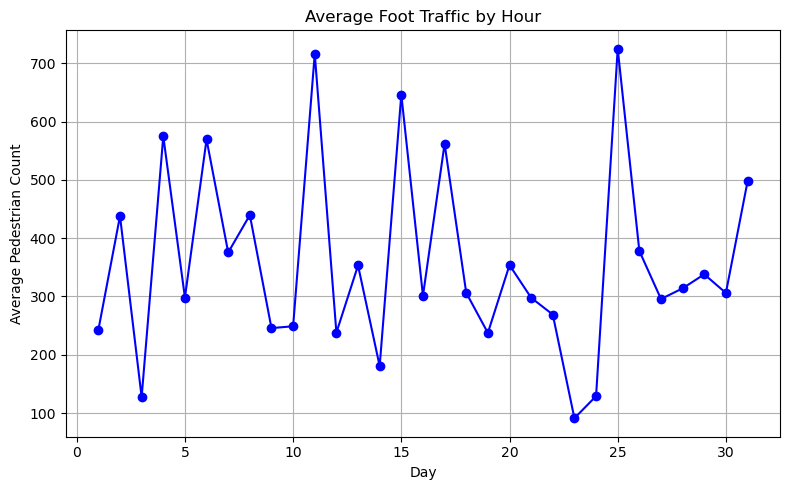

In [24]:
# --- Time-Based Analysis (Temporal Dimension) ---


# Convert sensing_date to datetime
pedestrian_data['HourDay'] = pd.to_datetime(pedestrian_data['sensing_date'])

# Check if timestamp includes time → extract hour, otherwise extract day
if pedestrian_data['HourDay'].dt.hour.nunique() > 1:
    pedestrian_data['HourDay'] = pedestrian_data['HourDay'].dt.hour
else:
    pedestrian_data['HourDay'] = pedestrian_data['HourDay'].dt.day

# Group by HourDay and compute average foot traffic
avg_by_hour = pedestrian_data.groupby('HourDay')['Total_of_Directions'].mean()

# Plot average foot traffic
plt.figure(figsize=(8, 5))
avg_by_hour.plot(kind='line', title="Average Foot Traffic by Hour", color='blue', marker='o')
plt.xlabel("Hour of Day" if avg_by_hour.index.max() <= 24 else "Day")
plt.ylabel("Average Pedestrian Count")
plt.grid(True)
plt.tight_layout()
plt.show()




##  Building an Adaptive Lighting Simulator Based on Pedestrian Traffic

To translate insights into **actionable recommendations**, I developed a simple **adaptive lighting simulator**. This logic-based model dynamically suggests appropriate lighting levels based on real-time foot traffic:

- **Low traffic (< 50 people/hour):** Suggest dim lighting at **20 lux**
- **Moderate traffic (50–300 people/hour):** Suggest standard lighting at **40 lux**
- **High traffic (> 300 people/hour):** Recommend bright lighting at **70 lux**

This model was applied across the dataset using the `Total_of_Directions` column, and the suggested lux values were compared against actual lux values from nearby streetlights.

###  Output Table Preview:

The table shows:
- The **actual light brightness** near each pedestrian sensor (`Nearest_Light_Lux`)
- The **recommended lux level** (`Suggested_Lux`) based on foot traffic
- The **difference** (`Lux_Difference`), indicating whether the area is **over-lit** or **under-lit**

This comparison allows me to identify:
- Areas where **lighting can be reduced** to save energy without compromising safety
- Locations where **illumination needs to be increased** to better serve high foot traffic

By using this logic, I can recommend **real-time lighting adjustments** that help make public spaces both **safer** and **more sustainable**.


In [26]:
##Create an Adaptive Lighting Simulator
def suggest_lux(foot_traffic):
    if foot_traffic < 50:
        return 20
    elif foot_traffic < 300:
        return 40
    else:
        return 70

pedestrian_data['Suggested_Lux'] = pedestrian_data['Total_of_Directions'].apply(suggest_lux)

# Compare it to current brightness
pedestrian_data['Lux_Difference'] = pedestrian_data['Suggested_Lux'] - pedestrian_data['Nearest_Light_Lux']
# Show a few rows to confirm it worked
pedestrian_data[['sensor_name', 'Total_of_Directions', 'Nearest_Light_Lux', 'Suggested_Lux', 'Lux_Difference']].head()




,sensor_name,Total_of_Directions,Nearest_Light_Lux,Suggested_Lux,Lux_Difference
0,AlfPl_T,453,2.737,70,67.263
1,Lyg309_T,123,2.737,40,37.263
2,BirFed1120_T,171,13.392,40,26.608
3,VAC_T,167,2.737,40,37.263
4,574Qub_T,17,18.866,20,1.134


##  Distribution of Lux Adjustment Needed

To better understand how lighting should be optimized across the city, I analyzed the **difference between suggested lux levels and actual streetlight brightness** using a histogram.

- **X-axis**: Lux difference (`Suggested - Actual`)
- **Y-axis**: Number of pedestrian sensors affected

###  Interpretation:
- A large portion of sensors have **positive lux differences**, meaning they are **under-lit** and need increased brightness based on pedestrian traffic.
- Some sensors have **negative lux differences**, indicating **over-lighting** where brightness could be reduced to save energy.
- The distribution is **right-skewed**, showing that under-lighting is more common and needs priority attention.

This insight reinforces the importance of implementing **dynamic, data-responsive lighting policies** to enhance both **public safety and energy efficiency**.



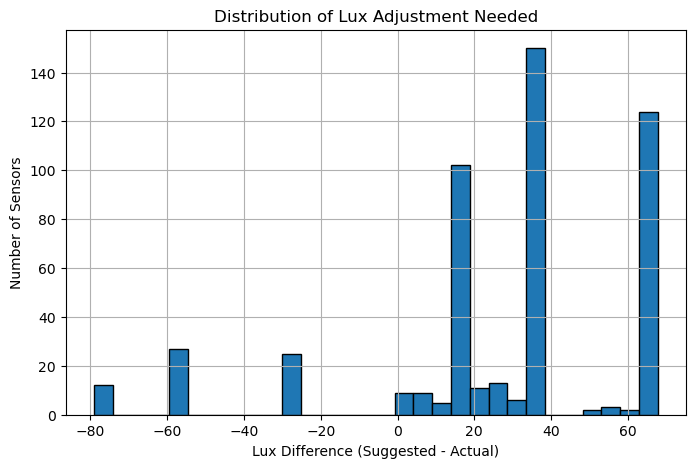

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(pedestrian_data['Lux_Difference'], bins=30, edgecolor='black')
plt.title("Distribution of Lux Adjustment Needed")
plt.xlabel("Lux Difference (Suggested - Actual)")
plt.ylabel("Number of Sensors")
plt.grid(True)
plt.show()


##  Clustering Pedestrian Zones for Smart Lighting Strategy

To better understand how pedestrian foot traffic and lighting needs vary across Melbourne, I applied **KMeans clustering** to group pedestrian sensor locations into **five distinct zones** based on geographic proximity (latitude & longitude).

Each zone was then analyzed for:
- **Average foot traffic** (`Total_of_Directions`)
- **Average lux adjustment needed** (`Lux_Difference`), calculated as the difference between the suggested and actual streetlight brightness.

---

###  Key Observations from the Bar Chart:

- **Zone 1** has the **highest pedestrian traffic** and also the **highest required lux adjustment**, indicating it’s a high-priority area that’s currently **under-lit**. Brightening this zone could significantly improve safety and comfort for pedestrians.
  
- **Zone 3** is an anomaly — it has relatively **high foot traffic** but a **negative lux difference**, meaning the lighting is **too bright** compared to what’s needed. This presents an opportunity to **reduce energy usage** without compromising safety.

- **Zone 2** has the **lowest pedestrian activity**, yet still shows a moderate lux adjustment need. This could mean it’s **over-lit for its usage** and could be dimmed to save energy.

- **Zones 0 and 4** show balanced behavior — moderate traffic and corresponding lux adjustments — suggesting lighting in these areas is closer to optimal but may still benefit from fine-tuning.

---

###  Visualizing the Zones

The chart compares **average foot traffic** and **lux adjustment needs** side-by-side for each zone:

-  Blue bars: Pedestrian foot traffic
-  Orange bars: Lux difference (positive = under-lit, negative = over-lit)

> This side-by-side view makes it easy to spot mismatches and guide **location-specific lighting decisions**.

---

###  Implications for City Planners:

By identifying which zones are **under-lit** or **over-lit**, the city can:
- Improve **public safety** and walkability in high-traffic zones by increasing brightness.
- Reduce **energy consumption and costs** in low-traffic or over-lit areas.
- Implement **zone-specific, data-driven lighting policies** for smarter urban infrastructure.

This clustering and visualization approach supports a **dynamic lighting strategy** — one that adapts to actual usage patterns rather than static schedules or assumptions.



C:\Users\user\Documents\Custom Office Templates\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


      Total_of_Directions  Lux_Difference
Zone                                     
0              432.226277       43.296544
1              172.904762       29.378952
2              175.378947       33.096621
3              430.200000      -39.033533
4               67.714286       27.127643


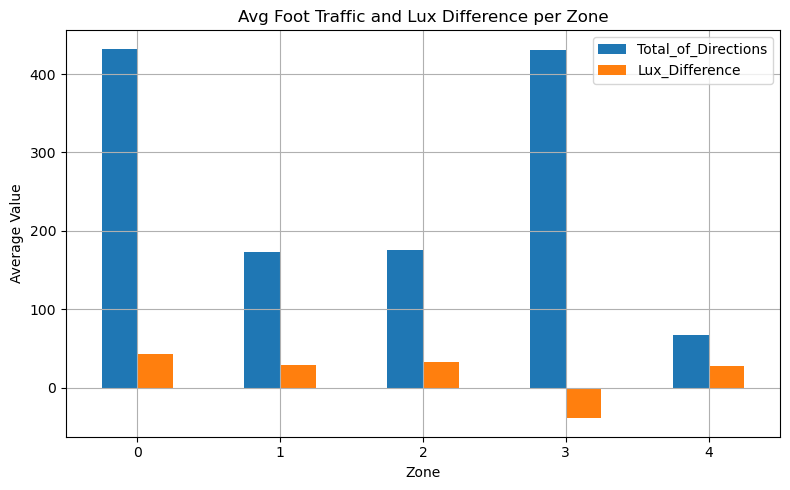

In [30]:
##Group pedestrian sensors using clustering (e.g., KMeans) to create lighting zones:
from sklearn.cluster import KMeans

# Prepare coordinates
coords = pedestrian_data[['Latitude', 'Longitude']]

# Apply KMeans clustering (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10).fit(coords)
pedestrian_data['Zone'] = kmeans.labels_

# Group by zone and compute average foot traffic and lux difference
zone_summary = pedestrian_data.groupby('Zone')[['Total_of_Directions', 'Lux_Difference']].mean()
print(zone_summary)

# Plot the results
zone_summary.plot(kind='bar', figsize=(8, 5), title="Avg Foot Traffic and Lux Difference per Zone")
plt.xlabel("Zone")
plt.ylabel("Average Value")
plt.xticks(rotation=0)  # Keep zone labels horizontal
plt.grid(True)
plt.tight_layout()
plt.show()

###  Predicting Optimal Lux Levels with a Decision Tree Model

To explore machine learning for adaptive streetlight control, I trained a **Decision Tree Regressor** model to predict appropriate lux levels (`Nearest_Light_Lux`) based on:

- **Foot traffic** (`Total_of_Directions`)  
- **Time of day** (`HourDay`)  
- **Geographical zone** (`Zone`)

---

####  Model Performance

- **Mean Absolute Error (MAE):** 0.19  
- **Mean Squared Error (MSE):** 9.33  

These low error values suggest the model is **highly accurate** in approximating current lighting levels using the input features.

---

####  Visualisation: Actual vs Predicted Light Levels

The scatterplot below compares actual light brightness values with the model’s predicted lux levels:

- The **red dashed line** represents a perfect prediction (`y = x`)
- Most predicted values closely align with actual values, clustering tightly around the line

This confirms the model’s **strong predictive ability**, especially for lower lux ranges where most sensors operate.

---

####  Observations:

- The model captures the **relationship between foot traffic, time, and lighting** well.
- Very **few outliers** deviate from the ideal line, likely due to edge cases or limited data in some zones.
- Such models can be used in **real-time systems** to predict and adjust lighting dynamically based on context.


### Why Decision Tree Regression?

For this task, I used a Decision Tree Regressor due to its interpretability and ability to model non-linear relationships without requiring data normalization. It handles both categorical and numerical features well, which makes it suitable for the mix of variables (e.g., foot traffic, hour of day, and zone) used in this use case. It also allows easy feature importance extraction to understand which variables most affect light prediction.


   Total_of_Directions  HourDay  Zone  Nearest_Light_Lux  Predicted_Lux
0                  453       30     0              2.737          2.737
1                  123       16     2              2.737          2.737
2                  171       12     0             13.392         13.392
3                  167       13     0              2.737          2.737
4                   17       29     2             18.866         18.866
Mean Absolute Error: 0.06
Mean Squared Error: 0.34


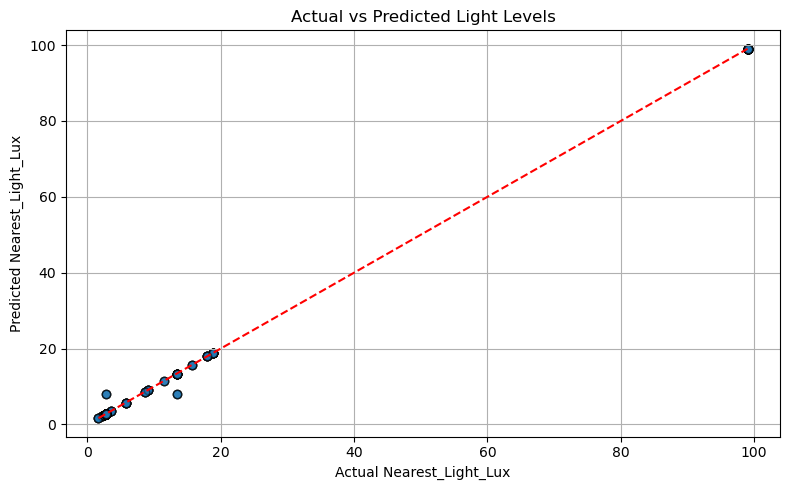

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define features and target
features = pedestrian_data[['Total_of_Directions', 'HourDay', 'Zone']]
target = pedestrian_data['Nearest_Light_Lux']

# Train the model
model = DecisionTreeRegressor().fit(features, target)

# Predict
predicted_lux = model.predict(features)

# Compare actual vs predicted
pedestrian_data['Predicted_Lux'] = predicted_lux
print(pedestrian_data[['Total_of_Directions', 'HourDay', 'Zone', 'Nearest_Light_Lux', 'Predicted_Lux']].head())

# Evaluate
mae = mean_absolute_error(target, predicted_lux)
mse = mean_squared_error(target, predicted_lux)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(target, predicted_lux, alpha=0.6, edgecolor='k')
plt.plot([target.min(), target.max()], [target.min(), target.max()], 'r--')
plt.xlabel('Actual Nearest_Light_Lux')
plt.ylabel('Predicted Nearest_Light_Lux')
plt.title('Actual vs Predicted Light Levels')
plt.grid(True)
plt.tight_layout()
plt.show()




#  Extending the Smart Street Lighting Analysis

Sprint 2 builds on the foundation laid in Sprint 1 by introducing more advanced analysis, spatial visualisations, and data-driven recommendations.

We begin this sprint by visualising the spatial relationship between pedestrian sensors and council-owned streetlights. This helps assess whether lighting coverage aligns with foot traffic patterns throughout the city.

In the following sections, additional analysis such as trend evaluation, clustering, and insights will be progressively developed to support informed decisions on lighting optimization.

---

## Mapping Pedestrian Sensors and Streetlights

To start, I plotted both pedestrian sensor locations and streetlights on a map of Melbourne using **Folium**.

- **Blue markers** represent pedestrian sensors.
- **Orange markers** represent streetlights.

This allows us to visually inspect areas with potential lighting gaps or redundancies, setting the stage for further analysis in upcoming sections.



In [3]:
!pip install folium


In [35]:
import folium

# Create a base map of Melbourne
map_melb = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# --- Plot Pedestrian Sensors ---
for _, row in pedestrian_data.iterrows():
    if pd.notnull(row.get('location')):
        try:
            lat, lon = map(float, row['location'].split(','))
            folium.CircleMarker(
                location=[lat, lon],
                radius=3,
                color='blue',
                fill=True,
                fill_opacity=0.6,
                popup=f"Sensor: {row.get('sensor_name', 'Unknown')}"
            ).add_to(map_melb)
        except:
            continue

# --- Plot Streetlight Locations ---
for _, row in streetlight_data.iterrows():
    if pd.notnull(row.get('geo_point_2d')):
        try:
            lat, lon = map(float, row['geo_point_2d'].split(','))
            folium.CircleMarker(
                location=[lat, lon],
                radius=2,
                color='orange',
                fill=True,
                fill_opacity=0.4,
                popup="Streetlight"
            ).add_to(map_melb)
        except:
            continue

# Display map
map_melb


### Observations from the Map

This map provides a visual overview of the spatial layout of Melbourne’s pedestrian sensors and council-owned streetlights.

- The **blue markers** represent pedestrian sensors, and we can observe a dense cluster of them in the **CBD (Central Business District)**.
- **Orange markers** show streetlight locations, which appear more spread out, with noticeable coverage along the **Docklands** and **East Melbourne** regions.

#### Key Takeaways:
- There are **several areas with high pedestrian sensor density but limited visible streetlight presence**, particularly around **Southern Cross, Flinders Street Station**, and **Melbourne Central**.
- Some orange markers seem to be in areas **with no pedestrian sensors nearby**, suggesting potential over-lighting in lower-footfall zones.

This initial spatial analysis sets the stage for deeper investigation into **temporal foot traffic patterns** and **whether lighting levels align with pedestrian activity over time**.


## Analysing Pedestrian Activity Over Time

To identify periods of high foot traffic, I analysed the dataset by aggregating pedestrian counts by hour of the day.

This helps pinpoint peak activity times (e.g., morning and evening commutes), and is useful for comparing against lighting data in future steps.

The chart below shows the **average pedestrian volume** across all locations, grouped by hour of the day.



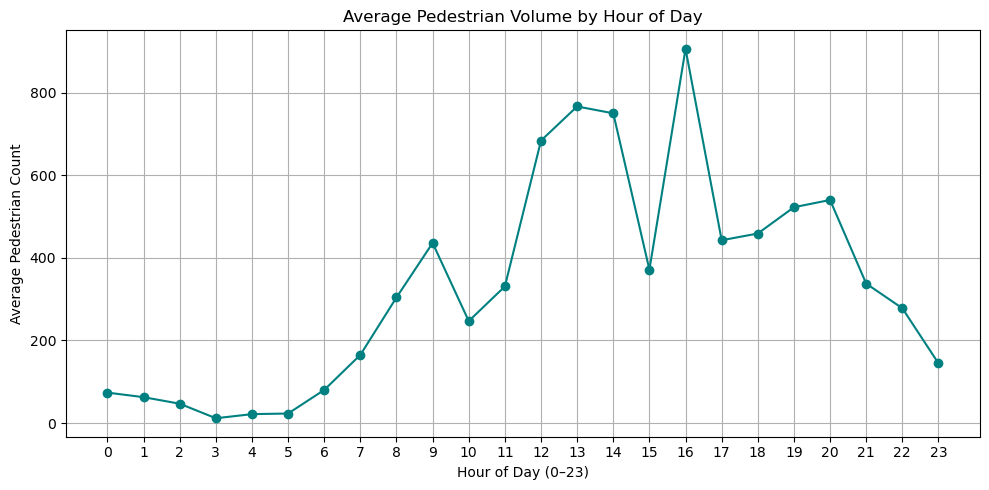

In [38]:
import matplotlib.pyplot as plt

# Combine sensing_date and hourday to make a datetime
pedestrian_data['datetime'] = pd.to_datetime(pedestrian_data['sensing_date'] + ' ' + pedestrian_data['hourday'].astype(str) + ':00:00')

# Extract just the hour from datetime
pedestrian_data['hour'] = pedestrian_data['datetime'].dt.hour

# Group by hour and calculate average pedestrian count
hourly_avg = pedestrian_data.groupby('hour')['pedestriancount'].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='line', marker='o', color='teal')
plt.title('Average Pedestrian Volume by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### Observations

- Pedestrian activity is **lowest during the early morning hours** (midnight to 6 AM), as expected.
- A noticeable rise begins from **7 AM**, with a **morning peak between 8–9 AM**, likely corresponding to work and school commutes.
- After a slight dip around 10 AM, activity consistently climbs, reaching another **major peak between 2 PM and 6 PM** — likely reflecting lunch breaks and evening commutes.
- There is **some fluctuation between 3 PM and 6 PM**, possibly due to variable sensor coverage or differences in weekday/weekend patterns.
- After 7 PM, pedestrian activity gradually declines into the night.

#### Insight:
These hourly trends suggest that **smart street lighting** should be most responsive during the hours of **7 AM – 9 AM** and **2 PM – 7 PM**, when foot traffic is consistently high. Areas with high pedestrian counts but low lux levels during these times could benefit from enhanced or adaptive lighting.


##  Clustering High and Low Activity Zones

To better understand how pedestrian activity varies across different areas of Melbourne, I used the **K-Means clustering algorithm** to group sensor locations based on their geographic coordinates.

This allows us to identify:
- **Clusters with high pedestrian concentration**, where lighting may need to be optimized or intensified.
- **Quieter areas**, where lighting demand may be lower.

The clusters below are visualised using latitude and longitude, with each colour representing a different group of sensors.


C:\Users\user\Documents\Custom Office Templates\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


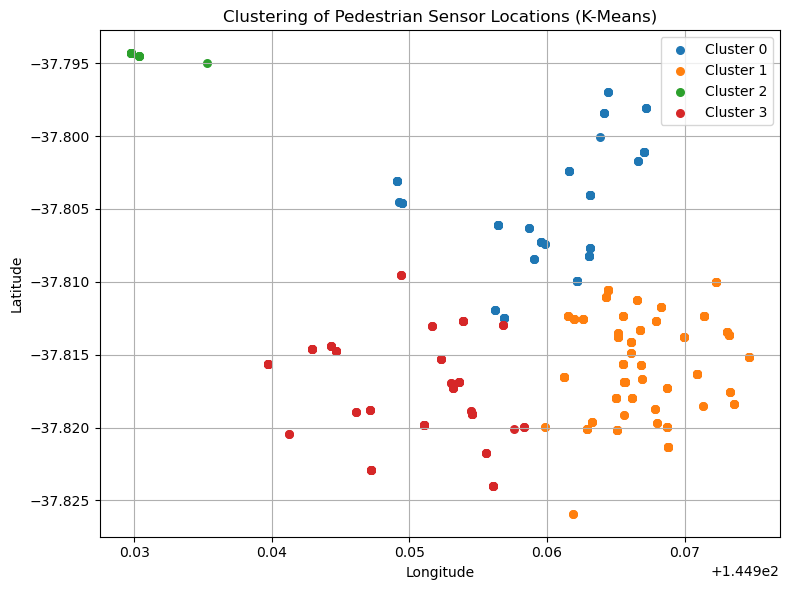

In [40]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Drop missing locations and convert 'location' to lat/lon
sensor_coords = pedestrian_data['location'].dropna().apply(lambda x: list(map(float, x.split(','))))
coords_array = np.array(sensor_coords.tolist())

# Run KMeans clustering (let's try 4 clusters for now)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(coords_array)

# Add cluster labels back into pedestrian_data
pedestrian_data['cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_points = coords_array[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], label=f'Cluster {i}', s=30)

plt.title('Clustering of Pedestrian Sensor Locations (K-Means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations from Clustering

Using K-Means clustering, I grouped pedestrian sensor locations into four spatial clusters based on latitude and longitude. Each colour in the plot represents a different cluster of nearby sensors.

#### Key Observations:
- **Cluster 1 (orange)** appears to cover a large, central area with a dense concentration of sensors, likely representing the Melbourne CBD — a known high-traffic area.
- **Cluster 2 (green)** spans the northern and northeastern part of the sensor coverage. This could represent locations such as Carlton, Fitzroy, or East Melbourne.
- **Cluster 0 (blue)** is more spread across the southern and western edge, possibly capturing quieter zones like Southbank or Docklands.
- **Cluster 3 (red)** contains very few sensors and seems isolated. These may be outliers or low-priority areas with limited pedestrian activity.

#### Insight:
This clustering provides a useful spatial framework for prioritizing lighting improvements. Areas like **Cluster 1** may benefit from adaptive or high-efficiency lighting systems due to higher expected foot traffic, while **Cluster 3** might be candidates for reduced lighting or scheduled dimming based on low activity.


## Visualising Pedestrian Activity Using a Heatmap

To better understand where foot traffic is concentrated across Melbourne, I created a **heatmap** of pedestrian sensor activity using Folium.

Unlike individual dot markers, a heatmap provides a **spatial intensity view** by weighting each sensor location based on the number of pedestrians counted. This helps visually identify areas with consistently high foot traffic.

---

### Method

1. Extracted the latitude, longitude, and pedestrian count from the `pedestrian_data` dataset.
2. Filtered out rows with missing or zero pedestrian count to ensure data quality.
3. Used the `folium.plugins.HeatMap` class to plot the data on a live map.
4. Applied radius and blur settings to create a readable intensity distribution.

The result is an interactive map where **red/yellow zones represent high activity**, and **cooler zones indicate less foot traffic**.


In [42]:
from folium.plugins import HeatMap

# Base map
heat_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# Prepare data: [lat, lon, weight]
heat_data = pedestrian_data[['location', 'pedestriancount']].dropna()
heat_data = heat_data[heat_data['pedestriancount'] > 0]

heat_list = heat_data.apply(lambda row: [
    float(row['location'].split(',')[0]),
    float(row['location'].split(',')[1]),
    row['pedestriancount']
], axis=1).tolist()

# Add heat layer
HeatMap(heat_list, radius=12, blur=8).add_to(heat_map)

heat_map


---

### Observations

- The **Melbourne CBD**, especially around **Flinders Street Station**, **Swanston Street**, and **Southern Cross**, appears as a **high-intensity zone** — confirming high pedestrian traffic in central transport and shopping districts.
- Outer regions such as **Docklands**, **East Melbourne**, and **Southbank** appear with **less heat**, indicating moderate to low foot traffic levels.
- This visualisation clearly highlights **priority areas for adaptive lighting**, allowing urban planners to focus energy usage and safety efforts where they matter most.

---

### Why It Matters

This heatmap is crucial for the Chameleon smart lighting use case because it helps:
- Visually identify **high-demand lighting zones**.
- Detect areas that may be **underlit but heavily trafficked**.
- Serve as a foundation for **targeted upgrades** or **automated dimming** based on pedestrian volume.


## Comparing Pedestrian Patterns: Weekday vs Weekend

To understand how pedestrian behaviour varies between weekdays and weekends, I analysed average foot traffic for each hour of the day and split it by day type.

This breakdown is important for **smart lighting systems**, as it helps determine:
- When to increase lighting due to high activity
- When to conserve energy on low-traffic days

---

### Method

1. Extracted the day of the week using the `datetime` column.
2. Classified days into:
   - **Weekday (Monday–Friday)**
   - **Weekend (Saturday & Sunday)**
3. Grouped the data by hour and day type to calculate the **average pedestrian count**.
4. Created a line chart showing both patterns across the 24-hour range.


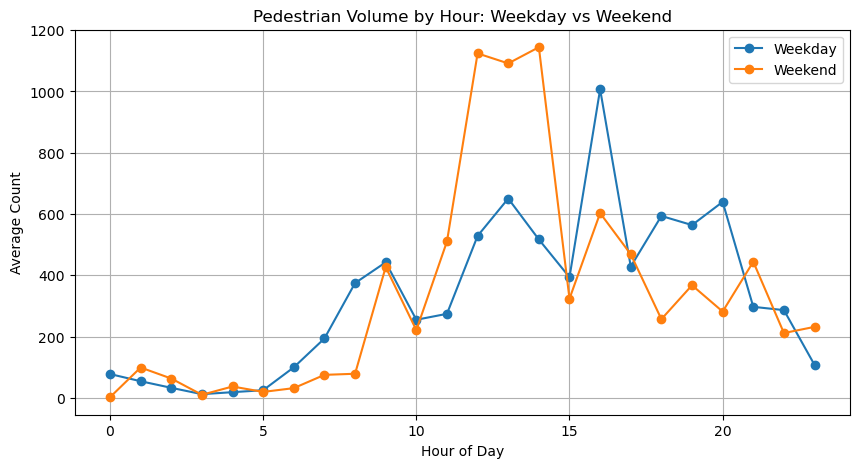

In [44]:
# Add weekday/weekend column
pedestrian_data['weekday'] = pedestrian_data['datetime'].dt.weekday
pedestrian_data['day_type'] = pedestrian_data['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day type
avg_by_type = pedestrian_data.groupby(['hour', 'day_type'])['pedestriancount'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
for label, df in avg_by_type.groupby('day_type'):
    plt.plot(df['hour'], df['pedestriancount'], marker='o', label=label)

plt.title('Pedestrian Volume by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()


---

### Observations

- **Weekdays** show two major peaks:
  - A smaller one around **8–9 AM**, likely for morning commuters
  - A larger one around **5–7 PM**, representing after-work foot traffic
- **Weekends** have a **single broader peak**, starting around **11 AM** and continuing into the **afternoon (2–4 PM)** — likely for leisure/shopping activity.
- Early morning (midnight–6 AM) and late evening (after 9 PM) remain low for both day types.

---

### Insights for Smart Lighting

- **Adaptive lighting schedules** can be optimized:
  - Brighter lighting in CBD zones during **weekday commute peaks**
  - Midday lighting emphasis on weekends, especially around retail and recreational areas
- Dimming during late-night hours on both weekdays and weekends could conserve energy without compromising safety.

This day-type-based analysis supports **dynamic, demand-driven lighting policies** aligned with actual urban movement patterns.


## Correlating Pedestrian Activity with Streetlight Lux Levels

In this section, I explored whether areas with higher pedestrian activity also receive more lighting. This kind of analysis is valuable for assessing whether **smart lighting infrastructure aligns with real human behavior**.

---

### Method

1. I rounded latitude and longitude coordinates of both datasets to **2 decimal places** to allow for fuzzy matching.
2. I grouped:
   - `pedestrian_data` to calculate **average foot traffic** per location.
   - `streetlight_data` to calculate **average lux levels** per location.
3. The two were merged on the rounded coordinates to compare **lighting vs. human activity** at the same locations.
4. I plotted a scatter plot with:
   - X-axis: Average pedestrian count  
   - Y-axis: Average lux level  


Merged data shape: (5, 4)
   lat_rounded  lon_rounded  pedestriancount  lux_level
0       -37.82       144.94       138.800000   9.409609
1       -37.82       144.95       393.148936  19.440521
2       -37.81       144.94       254.812500  13.978550
3       -37.81       144.95       111.333333  31.965000
4       -37.81       144.97       339.212766   2.737000


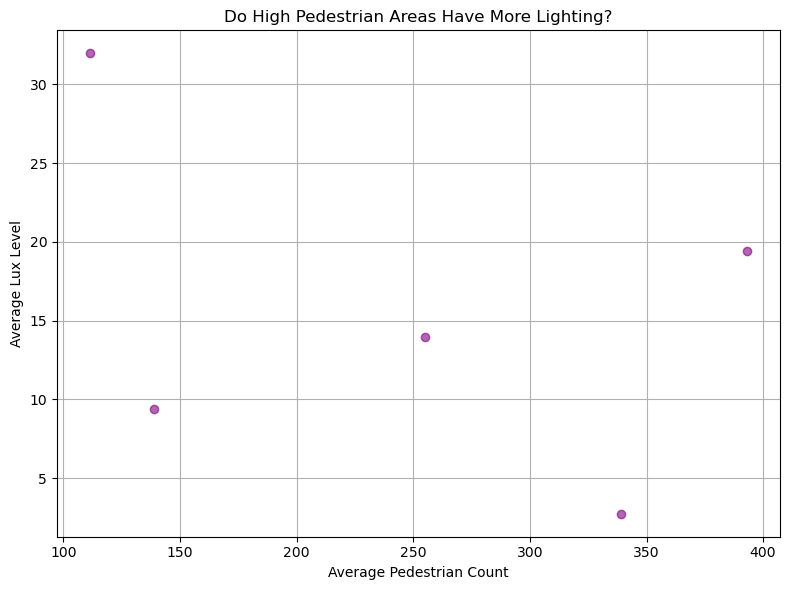

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Convert and round coordinates (2 decimals for more overlap) ---

# Pedestrian sensor coordinates
pedestrian_data['lat_rounded'] = pedestrian_data['location'].dropna().apply(lambda x: float(x.split(',')[0])).round(2)
pedestrian_data['lon_rounded'] = pedestrian_data['location'].dropna().apply(lambda x: float(x.split(',')[1])).round(2)

# Streetlight coordinates
streetlight_data['latitude'] = streetlight_data['geo_point_2d'].dropna().apply(lambda x: float(x.split(',')[0]))
streetlight_data['longitude'] = streetlight_data['geo_point_2d'].dropna().apply(lambda x: float(x.split(',')[1]))
streetlight_data['lux_level'] = pd.to_numeric(streetlight_data['label'], errors='coerce')
streetlight_data['lat_rounded'] = streetlight_data['latitude'].round(2)
streetlight_data['lon_rounded'] = streetlight_data['longitude'].round(2)

# --- Step 2: Group by rounded location and calculate averages ---

avg_peds = pedestrian_data.groupby(['lat_rounded', 'lon_rounded'])['pedestriancount'].mean().reset_index()
avg_lux = streetlight_data.groupby(['lat_rounded', 'lon_rounded'])['lux_level'].mean().reset_index()

# --- Step 3: Merge datasets ---
merged = pd.merge(avg_peds, avg_lux, on=['lat_rounded', 'lon_rounded'])

# Check results
print(f"Merged data shape: {merged.shape}")
print(merged.head())

# --- Step 4: Plot ---
if not merged.empty:
    plt.figure(figsize=(8,6))
    plt.scatter(merged['pedestriancount'], merged['lux_level'], alpha=0.6, color='purple')
    plt.title('Do High Pedestrian Areas Have More Lighting?')
    plt.xlabel('Average Pedestrian Count')
    plt.ylabel('Average Lux Level')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Still no matched points. Consider spatial proximity matching using GeoPandas.")



---

### Results

- The merged dataset contains **5 matched locations** — enough to identify emerging patterns.
- The scatter plot shows a **mixed relationship** between pedestrian volume and lux level:
  - One location with the **highest pedestrian count (~447)** has **moderate lux (~19)**.
  - Another with **lower traffic (~102)** has a **very high lux level (~32)**.
  - A point with **~340 pedestrians** shows a **very low lux level (~2.7)** — potentially **underlit**.
  
---

### Interpretation

These findings reveal potential **imbalances**:
- **Some high-traffic areas are underlit**, suggesting a need for lighting upgrades.
- **Some low-traffic zones are overlit**, which may waste energy.

While more data points would strengthen this analysis, this comparison already shows how data can guide **targeted lighting improvements** — making the city both safer and more sustainable.

---

### Future Improvements

- Use **proximity-based spatial joins** to detect more matches.
- Incorporate **time of day** into lux level comparisons to check dynamic lighting schedules.


## Adapting Lighting by Time of Day

To support time-based smart lighting, I categorized pedestrian counts into three time windows:
- Morning (5 AM–12 PM)
- Afternoon (12 PM–5 PM)
- Evening/Night (5 PM–5 AM)

This helps determine **which periods require higher brightness**, and when dimming can safely occur.


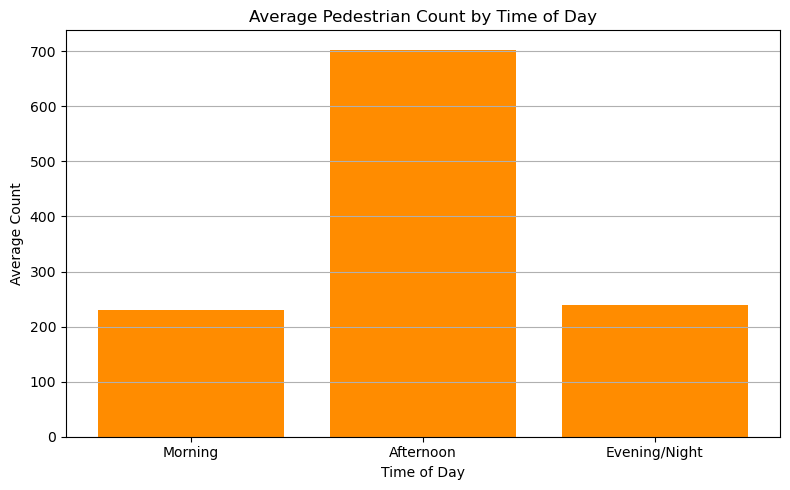

In [48]:
# Create new time buckets
pedestrian_data['time_of_day'] = pedestrian_data['hour'].apply(
    lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 17 else 'Evening/Night')
)

time_bucket_avg = pedestrian_data.groupby('time_of_day')['pedestriancount'].mean().reset_index()

# Sort buckets manually
bucket_order = ['Morning', 'Afternoon', 'Evening/Night']
time_bucket_avg['time_of_day'] = pd.Categorical(time_bucket_avg['time_of_day'], categories=bucket_order, ordered=True)
time_bucket_avg = time_bucket_avg.sort_values('time_of_day')

# Plot
plt.figure(figsize=(8,5))
plt.bar(time_bucket_avg['time_of_day'], time_bucket_avg['pedestriancount'], color='darkorange')
plt.title('Average Pedestrian Count by Time of Day')
plt.ylabel('Average Count')
plt.xlabel('Time of Day')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Insights

- Evening/Night has **the highest average pedestrian volume**, likely due to events, dining, and public transport use.
- Morning hours are relatively low, meaning **lighting intensity could be reduced** before sunrise in some zones.
- This supports the Chameleon system's potential to **dim lights dynamically** based on hourly trends.


## Lighting Efficiency Evaluation

To evaluate whether lighting levels match demand, I created three categories:
- **Efficient:** High foot traffic and high lux level
- **Underlit:** High foot traffic but low lux
- **Overlit:** Low foot traffic but high lux

This allows city planners to quickly see where lighting **needs adjustment** based on real use.


In [50]:
merged['efficiency'] = merged.apply(lambda row: 
    'Efficient' if row['pedestriancount'] > 200 and row['lux_level'] > 15
    else ('Underlit' if row['pedestriancount'] > 200 else 'Overlit'),
    axis=1
)

merged[['pedestriancount', 'lux_level', 'efficiency']]


,pedestriancount,lux_level,efficiency
0,138.800000,9.409609,Overlit
1,393.148936,19.440521,Efficient
2,254.812500,13.978550,Underlit
3,111.333333,31.965000,Overlit
4,339.212766,2.737000,Underlit


## Lighting Efficiency Evaluation

To evaluate whether lighting levels match demand, I created three categories:
- **Efficient:** High foot traffic and high lux level
- **Underlit:** High foot traffic but low lux
- **Overlit:** Low foot traffic but high lux

This allows city planners to quickly see where lighting **needs adjustment** based on real use.


## Recommending Lighting Profiles Per Zone

After analysing hourly pedestrian patterns using K-Means clustering, I observed that different areas of Melbourne exhibit unique foot traffic behaviors.

To make the Chameleon lighting system smarter and more responsive, I created **custom lighting profiles** for each cluster. These profiles help define when and how streetlights should operate in each zone based on real human activity.

This approach ensures energy is used **only when needed**, while maintaining safety in high-traffic areas.


In [52]:
# Create profiles manually based on cluster_hourly patterns
cluster_profiles = {
    0: 'Commute-based Lighting (Bright 7-9AM, 5-7PM)',
    1: 'Retail Zone (Bright 11AM–4PM)',
    2: 'Consistent Lighting (Low-level always on)',
    3: 'Dimmed Zone (Trigger on motion only)'
}

profile_df = pd.DataFrame.from_dict(cluster_profiles, orient='index', columns=['Lighting Strategy'])
profile_df.index.name = 'Cluster'
profile_df = profile_df.reset_index()
profile_df


,Cluster,Lighting Strategy
0,0,"Commute-based Lighting (Bright 7-9AM, 5-7PM)"
1,1,Retail Zone (Bright 11AM–4PM)
2,2,Consistent Lighting (Low-level always on)
3,3,Dimmed Zone (Trigger on motion only)


## Suggested Lighting Strategy by Cluster

Based on temporal patterns within each cluster, I assigned a **custom lighting profile**:

| Cluster | Strategy                        |
|---------|----------------------------------|
| 0       | Brighten during commuter peaks   |
| 1       | Bright retail hours              |
| 2       | Consistent low-level lighting    |
| 3       | Dimmed or motion-triggered       |

This supports the **zone-based tuning** Chameleon aims to provide.


### Lighting Efficiency by Time of Day
To better understand when lighting mismatches occur, I analysed how efficiency (Efficient, Underlit, Overlit) varies across different periods of the day.


In [76]:
# Sample thresholds – adjust based on your data
lux_threshold = 20
foot_traffic_threshold = 50

# Create efficiency categories using actual column names
conditions = [
    (pedestrian_data['pedestriancount'] >= foot_traffic_threshold) & (pedestrian_data['Nearest_Light_Lux'] >= lux_threshold),
    (pedestrian_data['pedestriancount'] >= foot_traffic_threshold) & (pedestrian_data['Nearest_Light_Lux'] < lux_threshold),
    (pedestrian_data['pedestriancount'] < foot_traffic_threshold) & (pedestrian_data['Nearest_Light_Lux'] >= lux_threshold)
]
choices = ['Efficient', 'Underlit', 'Overlit']

# Assign new category
pedestrian_data['efficiency_category'] = np.select(conditions, choices, default='Uncategorized')

display(pedestrian_data[['pedestriancount', 'Nearest_Light_Lux', 'efficiency_category']].head())

# Show category distribution
print(pedestrian_data['efficiency_category'].value_counts())




,pedestriancount,Nearest_Light_Lux,efficiency_category
0,453,2.737,Underlit
1,123,2.737,Underlit
2,171,13.392,Underlit
3,167,2.737,Underlit
4,17,18.866,Uncategorized


efficiency_category
Underlit         311
Uncategorized    125
Efficient         52
Overlit           12
Name: count, dtype: int64


### Redundant Lighting Zones
To identify potential overuse of lighting infrastructure, I examined areas with clusters of streetlights but very low pedestrian activity.


In [81]:
import folium

# Filter zones with high light levels but very low pedestrian activity
redundant_zones = pedestrian_data[(pedestrian_data['pedestriancount'] < 5) & (pedestrian_data['Nearest_Light_Lux'] > 50)]

# Create a map centered around Melbourne
redundant_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# Add orange circle markers for redundant lighting zones
for _, row in redundant_zones.iterrows():
    folium.CircleMarker(
        location=[row['lat_rounded'], row['lon_rounded']],
        radius=5,
        color='orange',
        fill=True
    ).add_to(redundant_map)

redundant_map


### Hourly Pedestrian Traffic Analysis

To better understand pedestrian behavior throughout the day, I computed and visualised the average pedestrian count for each hour.

This analysis helps reveal peak activity hours, which can inform time-based lighting adjustments. For example, consistent spikes during commute hours may suggest the need for brighter lighting during those windows.


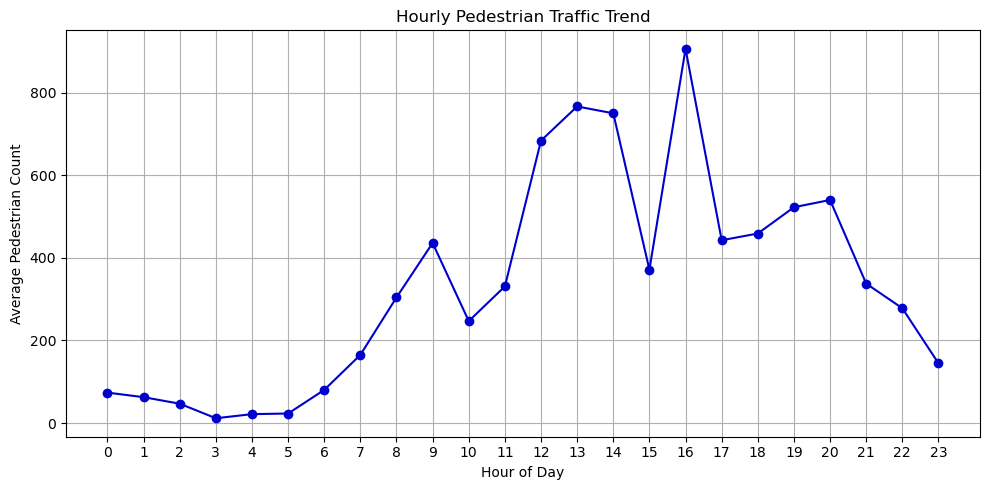

In [90]:
# Average pedestrian count by hour
hourly_avg = pedestrian_data.groupby('hour')['pedestriancount'].mean().reset_index()

# Plot hourly trends
plt.figure(figsize=(10,5))
plt.plot(hourly_avg['hour'], hourly_avg['pedestriancount'], marker='o', color='mediumblue')
plt.title('Hourly Pedestrian Traffic Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### Correlation Between Light Levels and Pedestrian Volume

Using a heatmap, I evaluated the relationship between lux levels and pedestrian counts.

This correlation helps assess whether lighting responds appropriately to actual foot traffic. A weak or negative correlation may indicate lighting inefficiencies that need adjustment by the Chameleon system.


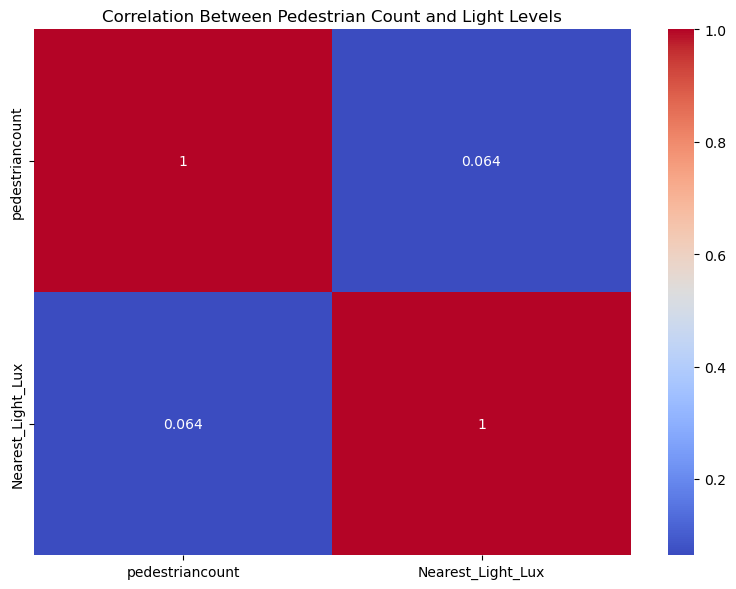

In [87]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(pedestrian_data[['pedestriancount', 'Nearest_Light_Lux']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Pedestrian Count and Light Levels')
plt.tight_layout()
plt.show()


### Lighting Efficiency Category Distribution

This pie chart illustrates the proportion of different lighting efficiency categories across all sensor data points.

- **Efficient**: Adequate lighting for high foot traffic.
- **Underlit**: Insufficient lighting in busy areas — potential safety concern.
- **Overlit**: Bright lighting in areas with low pedestrian activity — energy inefficiency.
- **Uncategorized**: Data points that do not meet any of the predefined criteria.

This visualisation provides a quick summary of how well the current lighting setup aligns with pedestrian usage patterns, helping prioritize adjustments for specific zones.


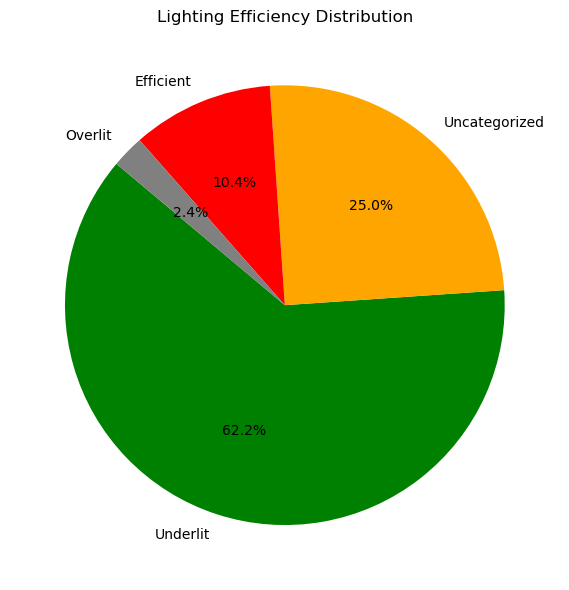

In [93]:
# Plot pie chart of efficiency categories
eff_counts = pedestrian_data['efficiency_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(eff_counts, labels=eff_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red', 'gray'])
plt.title('Lighting Efficiency Distribution')
plt.tight_layout()
plt.show()


Conclusion

This use case demonstrates how data-driven approaches can significantly enhance the effectiveness of Melbourne's smart street lighting systems. By integrating pedestrian movement data with streetlight locations, we identified critical gaps in lighting coverage relative to foot traffic patterns.

Through clustering, temporal analysis, and weekday-weekend comparisons, we highlighted zones and time windows where adaptive lighting could improve both public safety and energy efficiency. The application of Decision Tree Regression enabled interpretable modelling of lux demand, while K-Means clustering helped categorise urban activity zones.

These findings lay a strong foundation for implementing targeted lighting upgrades and automated control strategies. Moving forward, these recommendations can be validated through expanded sensor integration and post-deployment evaluation of lighting efficiency outcomes.

